# Importing Data and Pre-Processing

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Fetching the dataset

url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
data = pd.read_csv(url)

# import pandas as pd

# # Define the correct column names
# column_names = ['Loan_Id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#                 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term',
#                 'Credit History', 'Property_Area', 'Loan_Status']

# # Define the columns you want to convert to float
# float_columns = ['CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit History']

# # Create a dictionary for dtype specification
# dtype_dict = {col: float for col in float_columns}

# # Read the CSV file, skipping the first row (the incorrect header) and setting the correct header
# url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
# data = pd.read_csv(url, header=1, names=column_names, dtype=dtype_dict)

# # Display the first few rows of the DataFrame to check the results
# print(data.head())


In [3]:
data.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
df = pd.read_csv('loan_prediction.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see that value of first rows set as Header, So we need to set column name as in the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.shape

(614, 13)

In [9]:
# Checking for null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

*Null values present in columns , "Gender, Married , Dependents , Self_Employed , Loan_Amount , Loan_Amount_Term , Credit History' *

In [10]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

*Almost columns have unique values but Applicant Income ,CoapplicantIncome and  Loan_Amount have large number of unique values*

# **EDA : Exploratory Data Analysis**

In [11]:
df.describe() #Checking for Dataset Statistcal Summary.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


*Here total counts, mean, std, min, 25%, 50%, 75%, max are very much differing values as null values are present in our dataset.*

<ipython-input-12-24d7b17ae50e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Loan_Status' , data = df , palette='Set2')


<Axes: xlabel='Loan_Status', ylabel='count'>

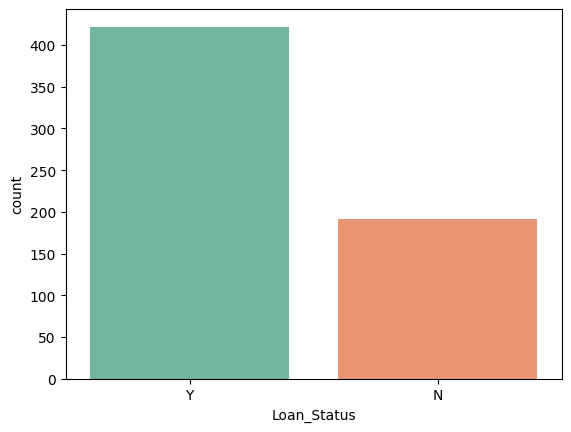

In [12]:
#Visualizing Loan_Status column using countplot

sns.countplot(x = 'Loan_Status' , data = df , palette='Set2')

In [13]:
(df["Loan_Status"]=="Y").value_counts()

Loan_Status
True     422
False    192
Name: count, dtype: int64

# Visualizing Categorical Variables

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

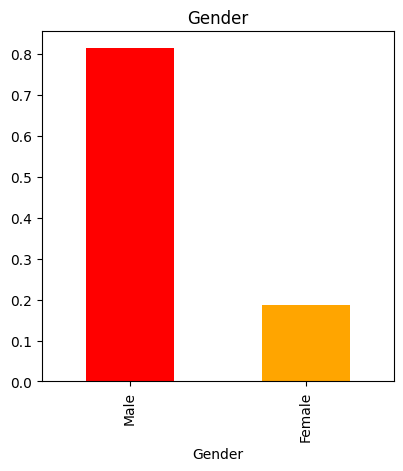

In [14]:
# Visualizing Gender column using bar plot.

plt.figure(1)
plt.subplot(221)
df["Gender"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Gender",color=["red","orange"])

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

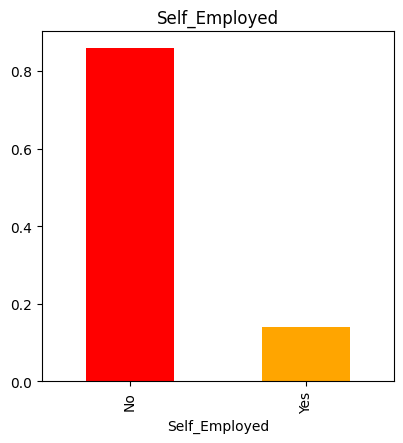

In [15]:
# Visualizing self_employed column using bar plot.

plt.figure(1)
plt.subplot(222)
df["Self_Employed"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Self_Employed",color=["red","orange"])

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

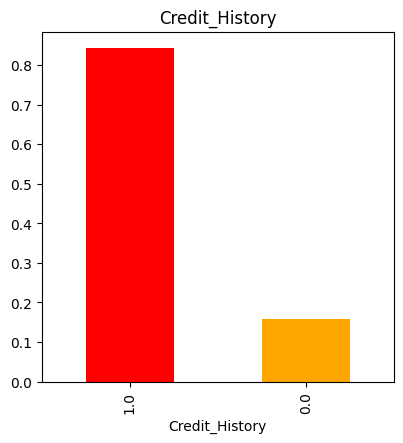

In [16]:
# Visualizing Credit_History column using bar plot.

plt.figure(1)
plt.subplot(222)
df["Credit_History"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Credit_History",color=["red","orange"])

<Axes: title={'center': 'Married'}, xlabel='Married'>

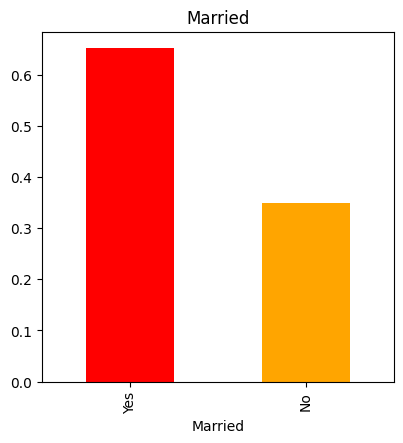

In [17]:
# Visualizing Married column using bar plot..

plt.figure(1)
plt.subplot(222)
df["Married"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="Married",color=["red","orange"])

# OBSERVATIONS

From above bar plot,

Male applying for loan are more as compared to female.

Maximum Self_Employed individuals applied for loan as compared to others.

Maximum no.of individuals have repaid their debits.

Maximun married ones are applying for loan as compared to un-married. *italicized text*

# Ordinal Variable

<Axes: xlabel='Dependents', ylabel='count'>

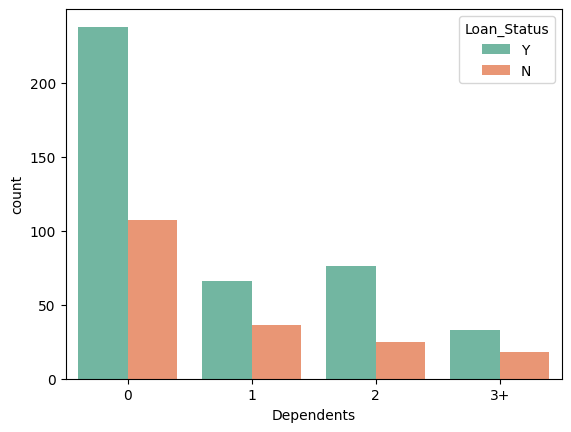

In [18]:
# Visualizing Dependents column regarding Loan_Status column.

sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette="Set2")

<Axes: xlabel='Education', ylabel='count'>

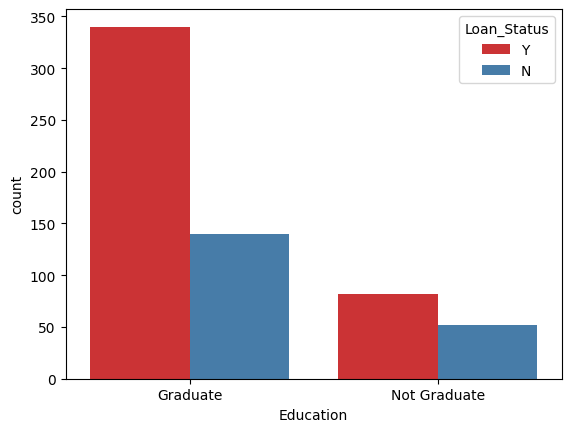

In [19]:
# Visualizing Education column regarding Loan_Status column.

sns.countplot(x="Education", hue="Loan_Status", data=df, palette="Set1")

<Axes: xlabel='Property_Area', ylabel='count'>

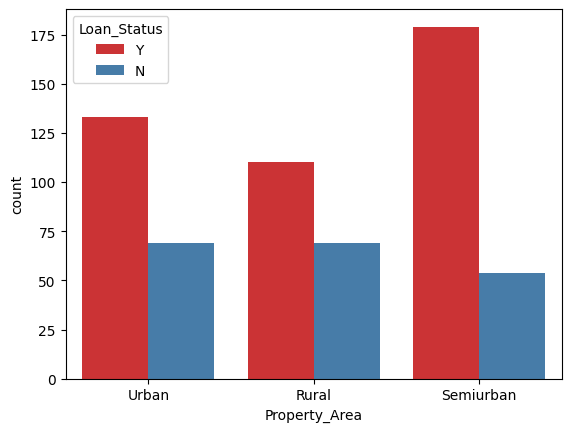

In [20]:
# Visualizing Property_Area column regarding Loan_Status column.

sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette="Set1")

# OBSERVATION

From above count plot,

Most no. of loan approved individuals are independent not dependent.

Maximum no. of loans are approved to graduate individuals as compared to under-graduates.

Most of the loans are approved to semiurban area.

*italicized text*

# Visualizing Independent Numerical Variables

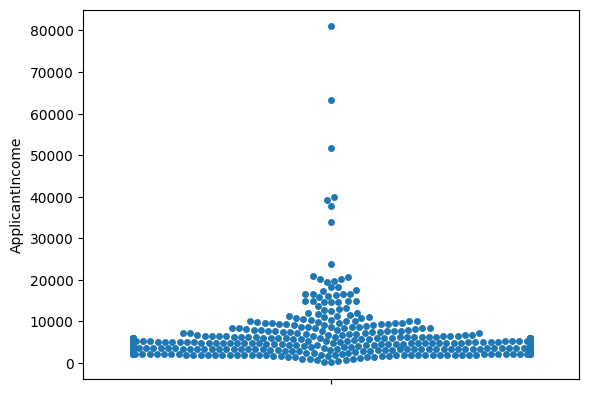

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing Aplicantincome column using swarmplot.
plt.figure(1)
sns.swarmplot(df["ApplicantIncome"])
plt.show()

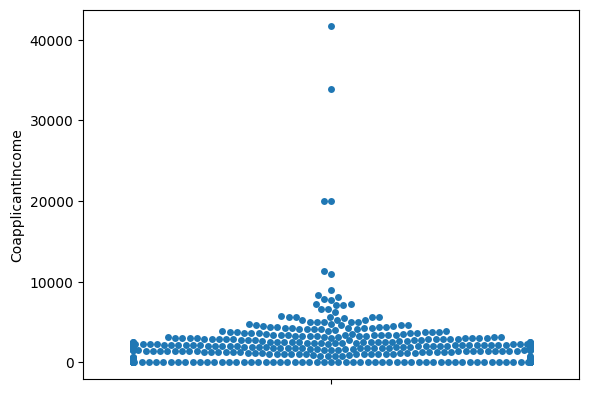

In [22]:
# Visualizing CoapplicantIncome Using swarm plot.

plt.figure(1)
sns.swarmplot(df["CoapplicantIncome"])
plt.show()

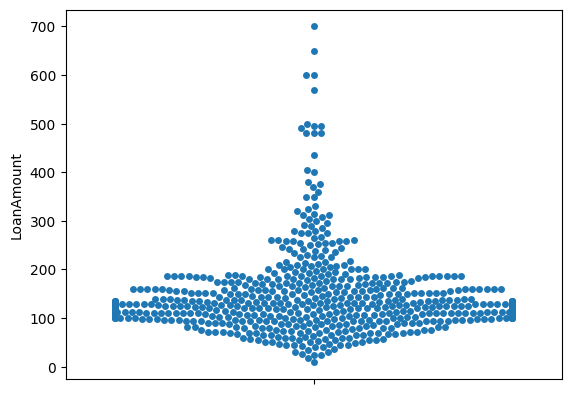

In [23]:
# Visualizing LoanAmount column using swarmplot.

plt.figure(1)
sns.swarmplot(df["LoanAmount"])
plt.show()

# OBVERVATIONS

Here from above,

We can see that there are outliers in ApplicantIncome column.

We can see that there are outliers in CoapplicantIncome column.

Similarly, outliers are present in LoanAmount column.

Checking Normality of these three columns

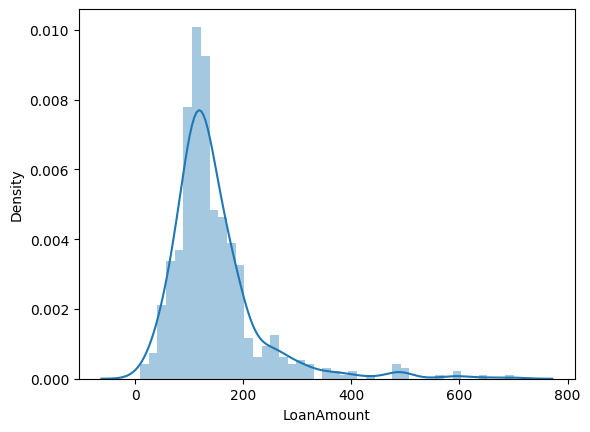

In [24]:
# Visualizing Loan Amount using Dist plot.

plt.figure(1)
sns.distplot(df["LoanAmount"])
plt.show()

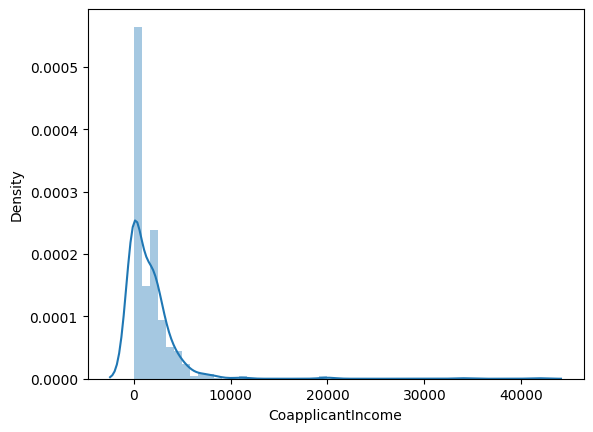

In [25]:
# Visualizing Coapplicant column using dist plot.

plt.figure(1)
sns.distplot(df["CoapplicantIncome"])
plt.show()

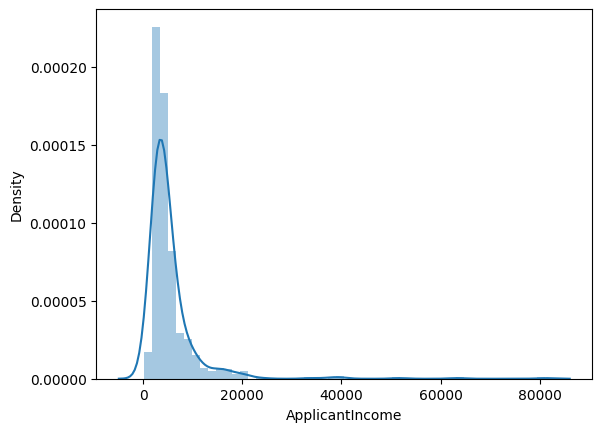

In [26]:
# Visualizing the ApplicantIncome column using dist plot.

plt.figure(1)
sns.distplot(df["ApplicantIncome"])
plt.show()

# OBSERVATIONS

From above we can say that,

the Loan_Amount column is not normally distributed,

the CoapplicantIncome column is not normally distributed,

the ApplicantIncome column is not normally distributed. *italicized text*

# **BIVARIATE ANALYSIS**

*Visualizing Gender,Married,Self_Employed,Dependents,Credit_History,Property_Area, columns combinely using bar plots in relation with Loan_Status column.*

<Axes: xlabel='Gender'>

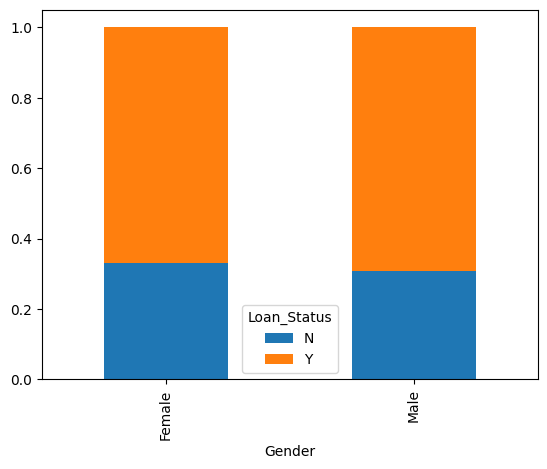

In [27]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<Axes: xlabel='Married'>

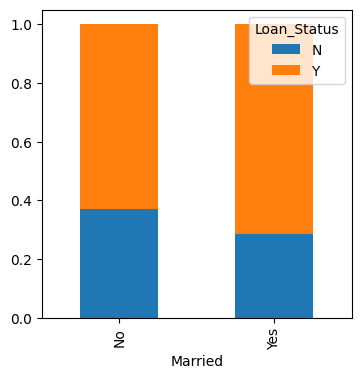

In [28]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Self_Employed'>

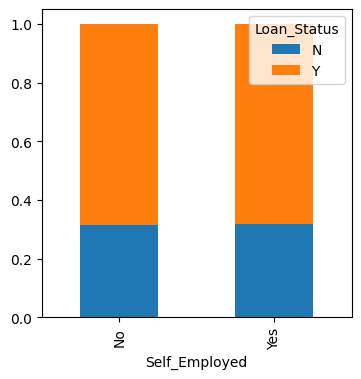

In [29]:
Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Employed.div(Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Self_Employed'>

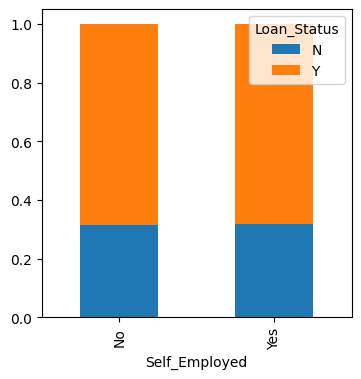

In [30]:
Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Employed.div(Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Dependents'>

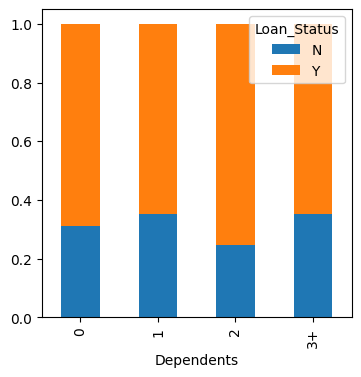

In [31]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='Property_Area'>

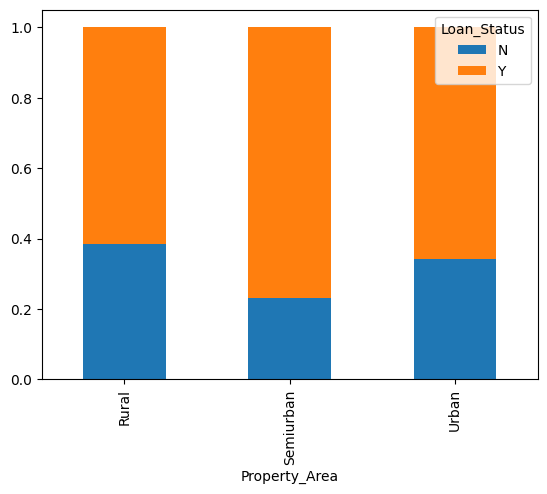

In [32]:
property_a = pd.crosstab(df["Property_Area"],df["Loan_Status"])
property_a.div(property_a.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

<Axes: xlabel='Credit_History'>

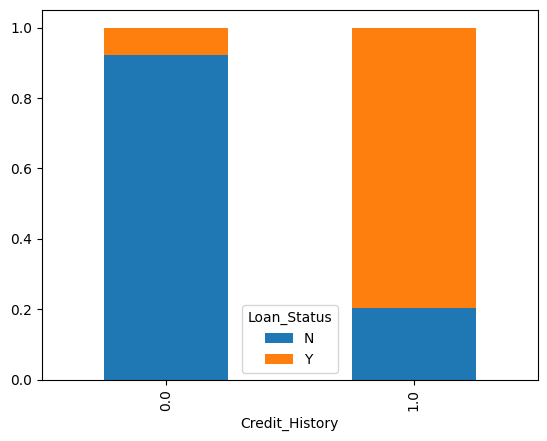

In [33]:
credit_hist = pd.crosstab(df["Credit_History"],df["Loan_Status"])
credit_hist.div(credit_hist.sum(1).astype(float),axis=0).plot(kind="bar",stacked="True")

# OBSERVATIONS

Both genders(Male & Female) posseses equal probability of loan approval.

Married individuals loan are more approved as comapred to un-married.

Loan approval for self employed and not self_emolyed posseses equal probability of loan approval.

Dependencies with 1, 2,3+ have almost same loan approval probabilty.

Semi urban area has most loan approvals.

Individuals with credit history 1 have most approved loan. *italicized text*

# **MULTIVARIATE ANALYSIS**

<Figure size 4000x4000 with 0 Axes>

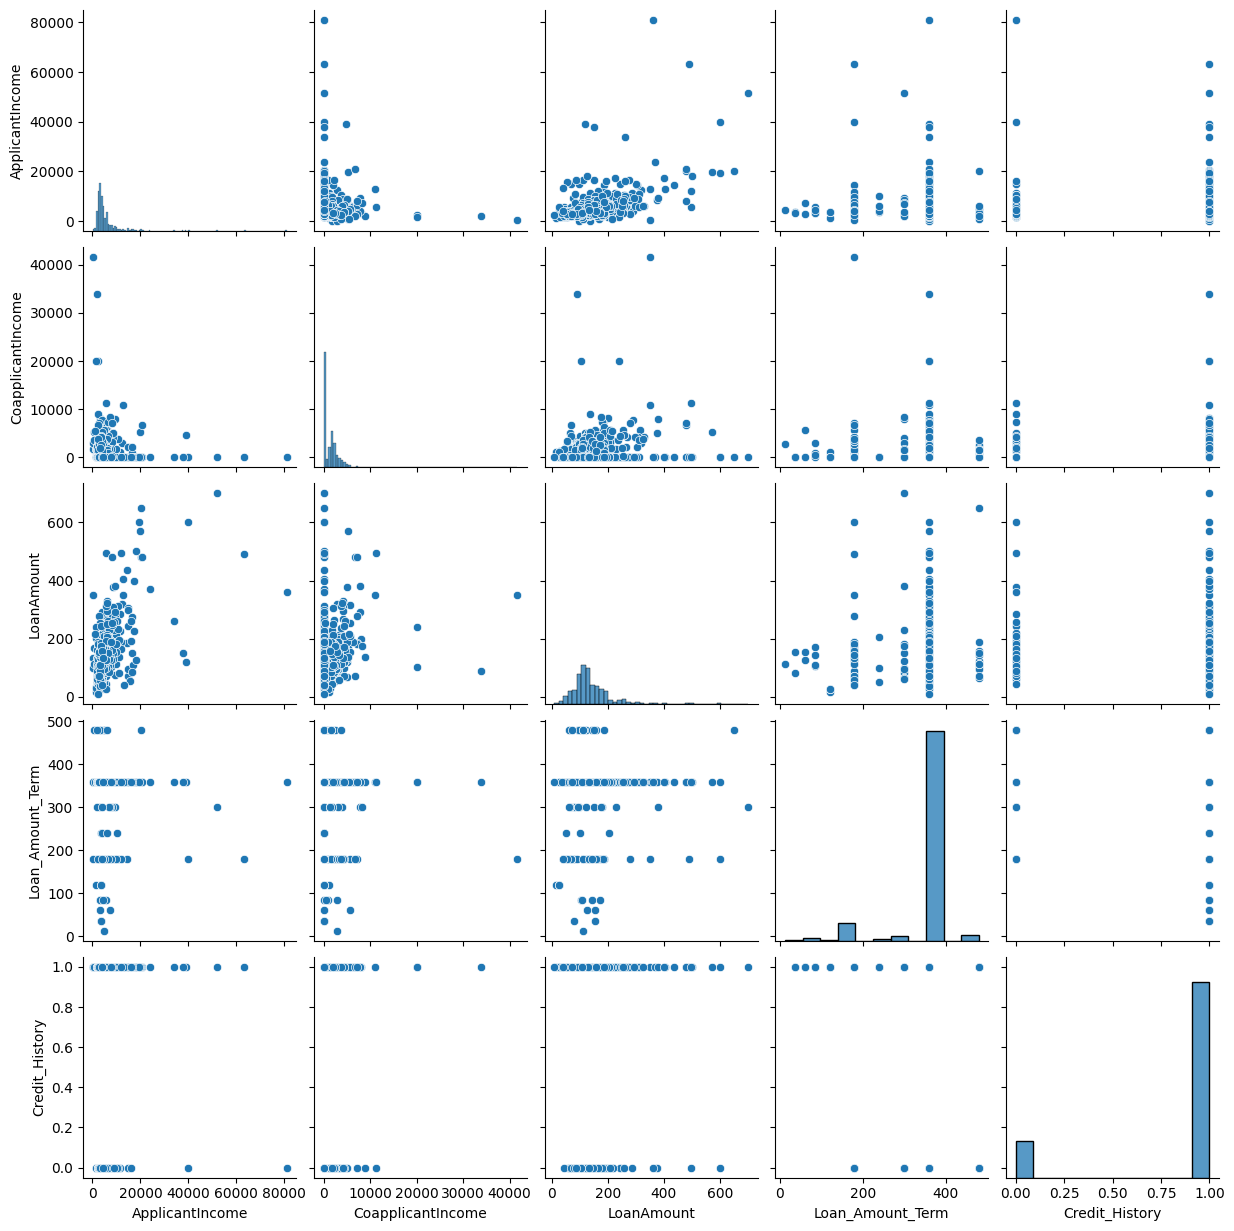

In [34]:
# Visualizing the pairwise relationship between columns.

plt.figure(figsize=(40,40))
sns.pairplot(df)
plt.show()

*From pair plot we observe that,data points doesn't show any linear relationship with each other as data points are too much scattered.*

*Let's get the 'Dependents' and 'Loan_Status'column encoded for further process.*

In [35]:
df['Dependents'].replace('3+', 3,inplace=True)
df['Dependents'].replace('3+', 3,inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)

*We successfully encoded the columns*

***Co-relation***

In [36]:
data_1 = df

In [42]:
#ata_1.drop(['Property_Area' , 'Loan_ID' , 'Gender' , 'Education' , 'Self_Employed'] , axis=1 , inplace=True)
data_1.columns

Index(['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [43]:
data_1.drop('Married', axis=1 , inplace=True)
#data_1.corr()

In [45]:
data_1.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [44]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

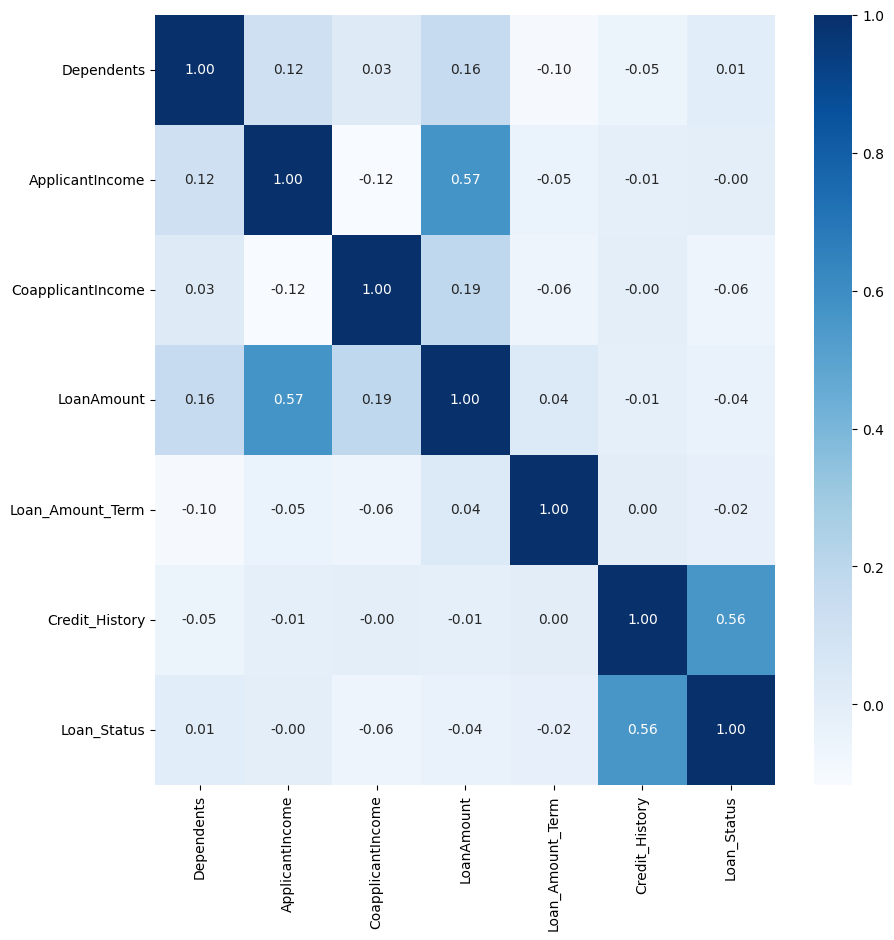

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(data_1.corr(),cmap='Blues',fmt='0.2f',annot=True)

*Here we can see that Loan Amount and Applicant Income , Loan Status and Credit History columns are correlated.*

# **Spliting the dataset**

In [47]:
# Separating the features to check the outliers fro model prediction.

loan_new=data_1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]

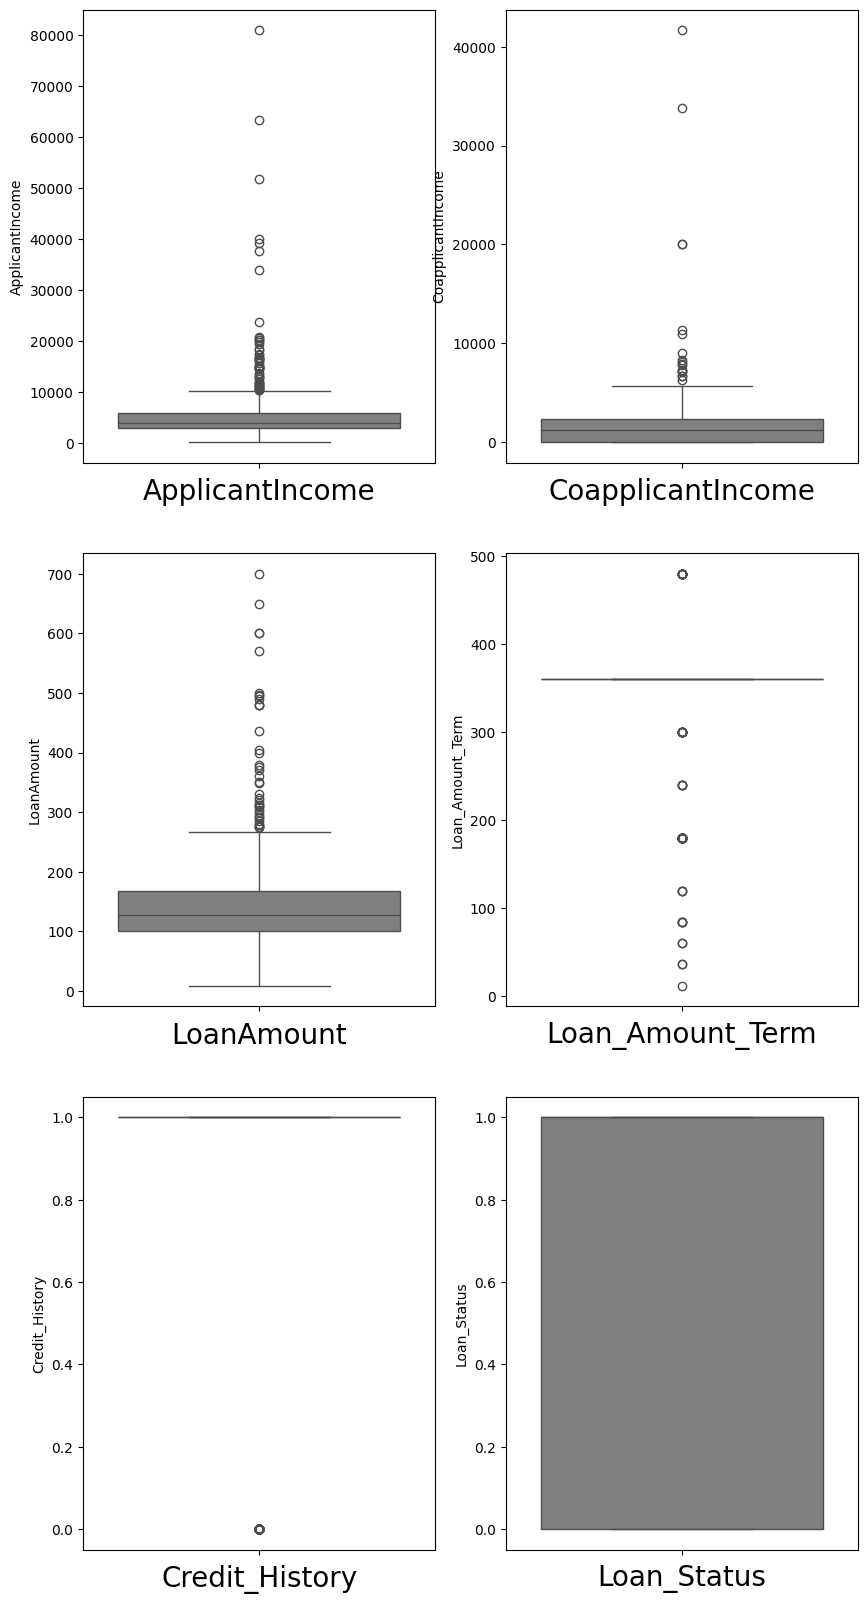

In [48]:
import warnings
warnings.filterwarnings('ignore')

# ploting the box plot for checking the outliers.

plt.figure(figsize=(10,20),facecolor='white')
plotnumber=1

for column in loan_new:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(loan_new[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

*All features have Outliers except than our target column*

<Axes: >

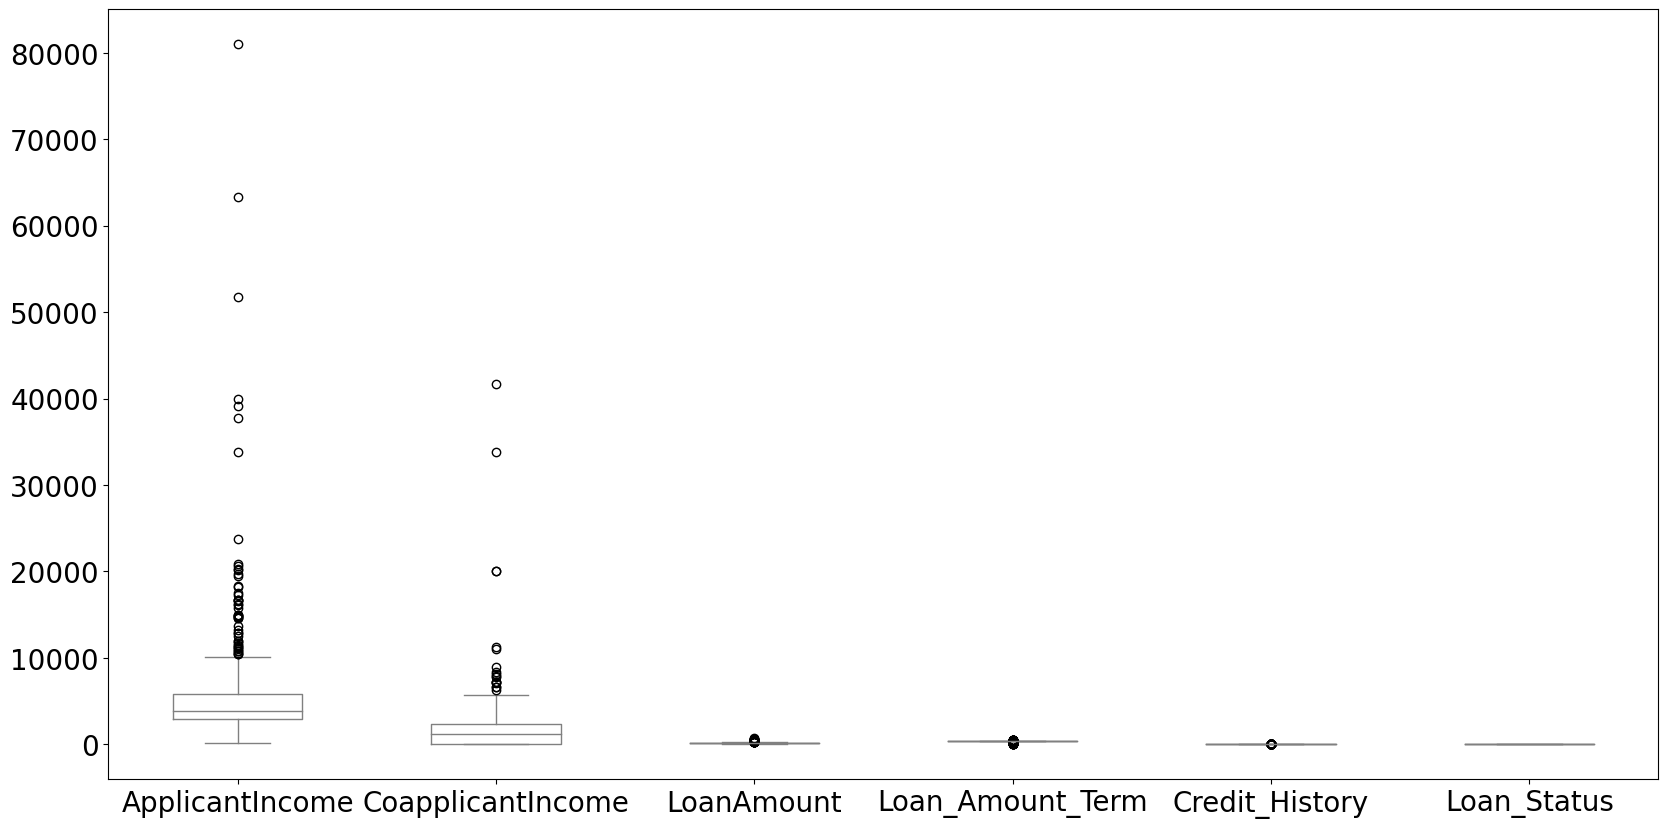

In [49]:
# Againg checking outliers for whole dataset.

data_1.plot(kind='box',fontsize=20,figsize=(20,10),color='grey')

*Here also we see that 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status' have outliers but 'Loan_Status' doesn't have any outlier.*

# **DATA CLEANING**

In [50]:
data_1.isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [55]:
data_1['Dependents'].fillna(data_1['Dependents'].mode()[0] , inplace = True)
data_1['LoanAmount'].fillna(data_1['LoanAmount'].mode()[0] , inplace = True)
data_1['Loan_Amount_Term'].fillna(data_1['Loan_Amount_Term'].mode()[0] , inplace = True)
data_1['Credit_History'].fillna(data_1['Credit_History'].mode()[0] , inplace = True)

In [52]:
data_1.shape

(614, 7)

In [56]:
data_1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

*Seperating the Outliers for outlier removal using zscore*

In [58]:
outliers=data_1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data_clear=data_1[(z<3).all(axis=1)]
data_clear.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,5849,0.0,120.0,360.0,1.0,1
1,1,4583,1508.0,128.0,360.0,1.0,0
2,0,3000,0.0,66.0,360.0,1.0,1
3,0,2583,2358.0,120.0,360.0,1.0,1
4,0,6000,0.0,141.0,360.0,1.0,1


In [60]:
data_clear.shape

(577, 7)

In [61]:
data_1.shape

(614, 7)

In [62]:
# Data loss after outlier removal.

Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

*There is not much data loss after outliers.*

In [63]:
data_clear.skew()

Dependents           1.052106
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Loan_Status         -0.822635
dtype: object

*We have some skewness in data , We will have to remove it by using power transformation.*

In [64]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [65]:
# Separating the columns for skewness removal.

data_clear[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = scaler.fit_transform(data_clear[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].values)

In [66]:
data_clear.skew()

Dependents           1.052106
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Loan_Status         -0.822635
dtype: object

In [67]:
# Separating the target column

x = df.drop('Loan_Status' , axis = 1)
y = df['Loan_Status']

x = features
y = target *italicized text*

In [68]:
x.shape

(614, 6)

In [69]:
y.shape

(614,)

In [70]:
x = pd.get_dummies(x)
df = pd.get_dummies(df)

In [71]:
x.shape

(614, 9)

In [72]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2'],
      dtype='object')

In [73]:
scaled=['ApplicantIncome','CoapplicantIncome','LoanAmount']

*The above columns needs standardization, so we seperated them.*

In [74]:
# For Standardization we will use StandardScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in scaled:
    x[column] = x[column].astype(float)
    x[[column]] = scaler.fit_transform(x[[column]])


In [75]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_3,Dependents_0,Dependents_1,Dependents_2
0,0.072991,-0.554487,-0.302759,360.0,1.0,False,True,False,False
1,-0.134412,-0.038732,-0.207648,360.0,1.0,False,False,True,False
2,-0.393747,-0.554487,-0.944757,360.0,1.0,False,True,False,False
3,-0.462062,0.251980,-0.302759,360.0,1.0,False,True,False,False
4,0.097728,-0.554487,-0.053093,360.0,1.0,False,True,False,False


*Columns are standardized successfully.*

# Checking the Multicollinearity in dataset using VIF.

In [78]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=pd.DataFrame()
# vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
# vif["Features"]=x.columns
# vif.head()

*Spliting the dataset into train and test*

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(

   x, y, test_size = 0.25, random_state = 30)

# **LOGISTIC REGRESSION**

In [80]:
# Model Building and Evaluation.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [81]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy: 77.92207792207793
[[ 16  29]
 [  5 104]]
              precision    recall  f1-score   support

           0       0.76      0.36      0.48        45
           1       0.78      0.95      0.86       109

    accuracy                           0.78       154
   macro avg       0.77      0.65      0.67       154
weighted avg       0.78      0.78      0.75       154



# **RANDOM FOREST CLASSIFIER**

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train , y_train)
pred_rf = rf.predict(x_test)
print("Accuracy - " , accuracy_score(y_test , pred_rf)*100)

# Checking the confusion matrix & classification report

print(confusion_matrix(y_test , pred_rf))
print(classification_report(y_test , pred_rf))

Accuracy -  74.02597402597402
[[18 27]
 [13 96]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.47        45
           1       0.78      0.88      0.83       109

    accuracy                           0.74       154
   macro avg       0.68      0.64      0.65       154
weighted avg       0.72      0.74      0.72       154



# **DECISION TREE CLASSIFIER**

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
pred_dt = dt.predict(x_test)
print("Accuracy - " , accuracy_score(y_test , pred_dt)*100)

# Checking the confusion matrix and classification report

print(confusion_matrix(y_test , pred_dt))
print(classification_report(y_test , pred_dt))

Accuracy -  72.72727272727273
[[23 22]
 [20 89]]
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        45
           1       0.80      0.82      0.81       109

    accuracy                           0.73       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.72      0.73      0.73       154



# **SUPPORT VECTOR CLASSIFIER**

In [84]:
# Support Vector Classifier

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 70.77922077922078
[[  0  45]
 [  0 109]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.71      1.00      0.83       109

    accuracy                           0.71       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.50      0.71      0.59       154



# **KNEIGHBORS CLASSIFIER**

In [86]:
# Applying KNeighbors Classifier for model building and evaluation.


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_knn)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


Accuracy: 76.62337662337663
[[ 18  27]
 [  9 100]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        45
           1       0.79      0.92      0.85       109

    accuracy                           0.77       154
   macro avg       0.73      0.66      0.67       154
weighted avg       0.75      0.77      0.75       154



# **Cross Validation for each model**

In [87]:
# Logistic Regression

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=13)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.8094312602291325


In [88]:
# RandomForest classifier

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rf , x , y , cv=13)
print("Cross_Validaton_Score for RandomForest is : " , cvs.mean())

Cross_Validaton_Score for RandomForest is :  0.7817785051827605


In [89]:
# Cross validation for Decision Tree

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(dt , x , y , cv = 13)
print("Cross_Validation_Score for Decision Tree classifier is : " , cvs.mean())

Cross_Validation_Score for Decision Tree classifier is :  0.7151868521549374


In [90]:
# Checking the cross validation score for SVC.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=13)
print('Cross_validation_score for SVC is:',cvs.mean())


Cross_validation_score for SVC is: 0.6872954173486087


In [91]:
# Let's check the cross validation score for KNeighborsClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=13)
print('Cross_validation_score for KNeighborsClassifier is:',cvs.mean())

Cross_validation_score for KNeighborsClassifier is: 0.7752318603382432


# **HYPERPARAMETER TUNNING**

In [93]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV


lr=LogisticRegression()

weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,
                                           1: 0.9504008016032064},
                                          {0: 0.05158316633266533,
                                           1: 0.9484168336673346},
                                          {0: 0.05356713426853708,
                                           1: 0.9464328657314629},
                                          {0: 0.055551102204408814,
                                           1: 0.9444488977955912},
                                          {0: 0.05753507014028056,
                                           1: 0.9424649298597194}, ...],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

In [94]:
# print best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.8848008073588776
Best hyperparameters:  {'C': 10, 'class_weight': {0: 0.448376753507014, 1: 0.551623246492986}, 'penalty': 'l2'}


In [95]:
# Building Model again with best params

lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(x_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [96]:
y_pred_prob_test = lr2.predict_proba(x_test)[:, 1]

In [97]:
y_pred_test = lr2.predict(x_test)

# **MODEL EVALUATION**

In [98]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, y_pred_test),'\n')


# ROC- AUC score
print("ROC-AUC score  test dataset:", roc_auc_score(y_test,y_pred_prob_test),'\n')

#Precision score
print("precision score  test dataset:", precision_score(y_test,y_pred_test),'\n')

#Recall Score
print("Recall score  test dataset:", recall_score(y_test,y_pred_test),'\n')

#f1 score
print("f1 score  test dataset :", f1_score(y_test,y_pred_test))

[[ 16  29]
 [  4 105]] 

ROC-AUC score  test dataset: 0.6301732925586137 

precision score  test dataset: 0.7835820895522388 

Recall score  test dataset: 0.963302752293578 

f1 score  test dataset : 0.8641975308641976


# Reason For Selecting Logistic Regression Model

*After Hyper parameter tunning we get the above scores for our model which are very well good,as score got improving,So we can say that Logistic Regression is best fit model for our dataset. *

In [99]:
# Saving the model

import pickle
pickle.dump(lr , open('df.pkl' , 'wb'))